<a href="https://colab.research.google.com/github/TheTarr/hw1/blob/zjy_colab/ntu_cv_project1_zjy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#读取图像文件并可视化


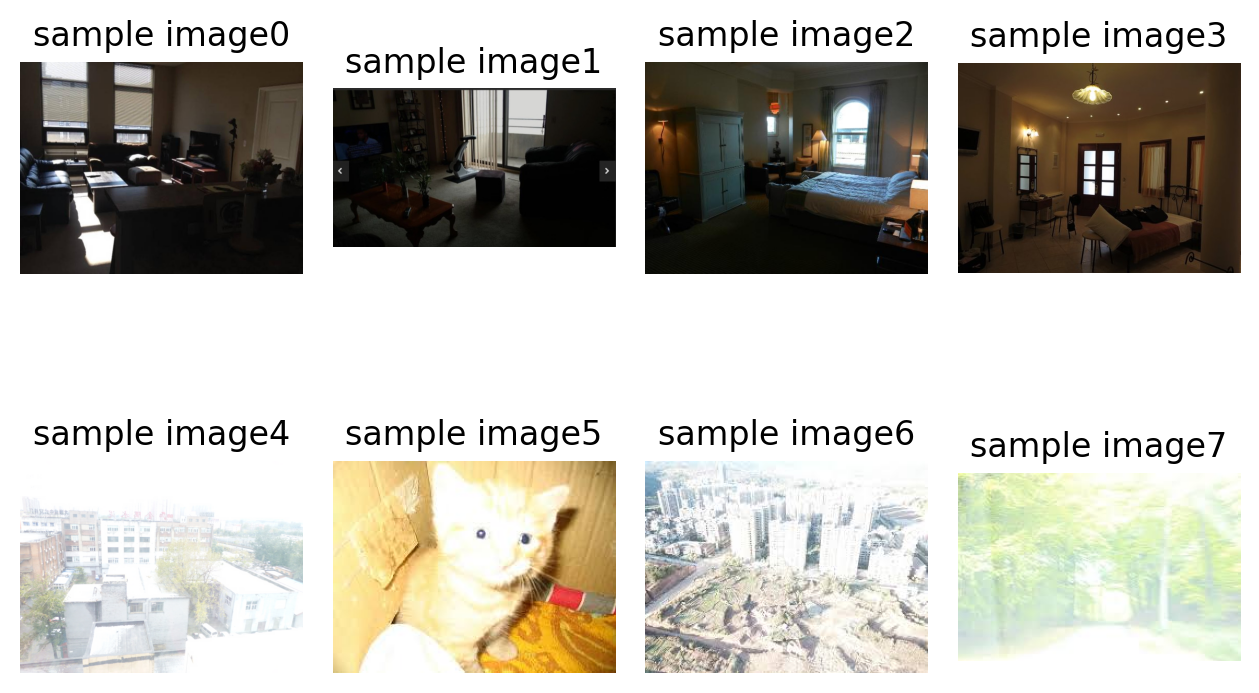

In [46]:
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# path
dir_path = '/content/drive/MyDrive/Colab Notebooks/computer vision/project1/sample images'

# get all picture from that path
files = [os.path.join(dir_path, file) for file in os.listdir(dir_path)]
imgs = []

for file in files:
  imgs.append(mpimg.imread(file))

plt.figure(dpi=200)
for i,img in enumerate(imgs):
  ax = plt.subplot(2,4,i+1)
  plt.axis('off')
  ax.set_title(f'sample image{i+1}')
  ax.imshow(img)
plt.tight_layout()
plt.show()

# 将RGB图像转换为灰度图，计算直方图，并可视化


###灰度图转换

In [36]:
# convert RGB image to Grey image
def rgb2grey(img_loc):
  img = Image.open(img_loc)
  g_img = img.convert('L')
  return g_img

g_imgs = []
for file in files:
  g_imgs.append(rgb2grey(file))

###计算直方图

In [112]:
# calculate the histogram of the image (pixel frequency list)
def cal_hist(img):
  pixel_f = list(img.getdata())
  return pixel_f

hists = []
for g_img in g_imgs:
  hists.append(cal_hist(g_img))

print(sum(hists[1]))
print(g_imgs[1])

7446987
<PIL.Image.Image image mode=L size=600x337 at 0x7F8535B6F5E0>


###可视化

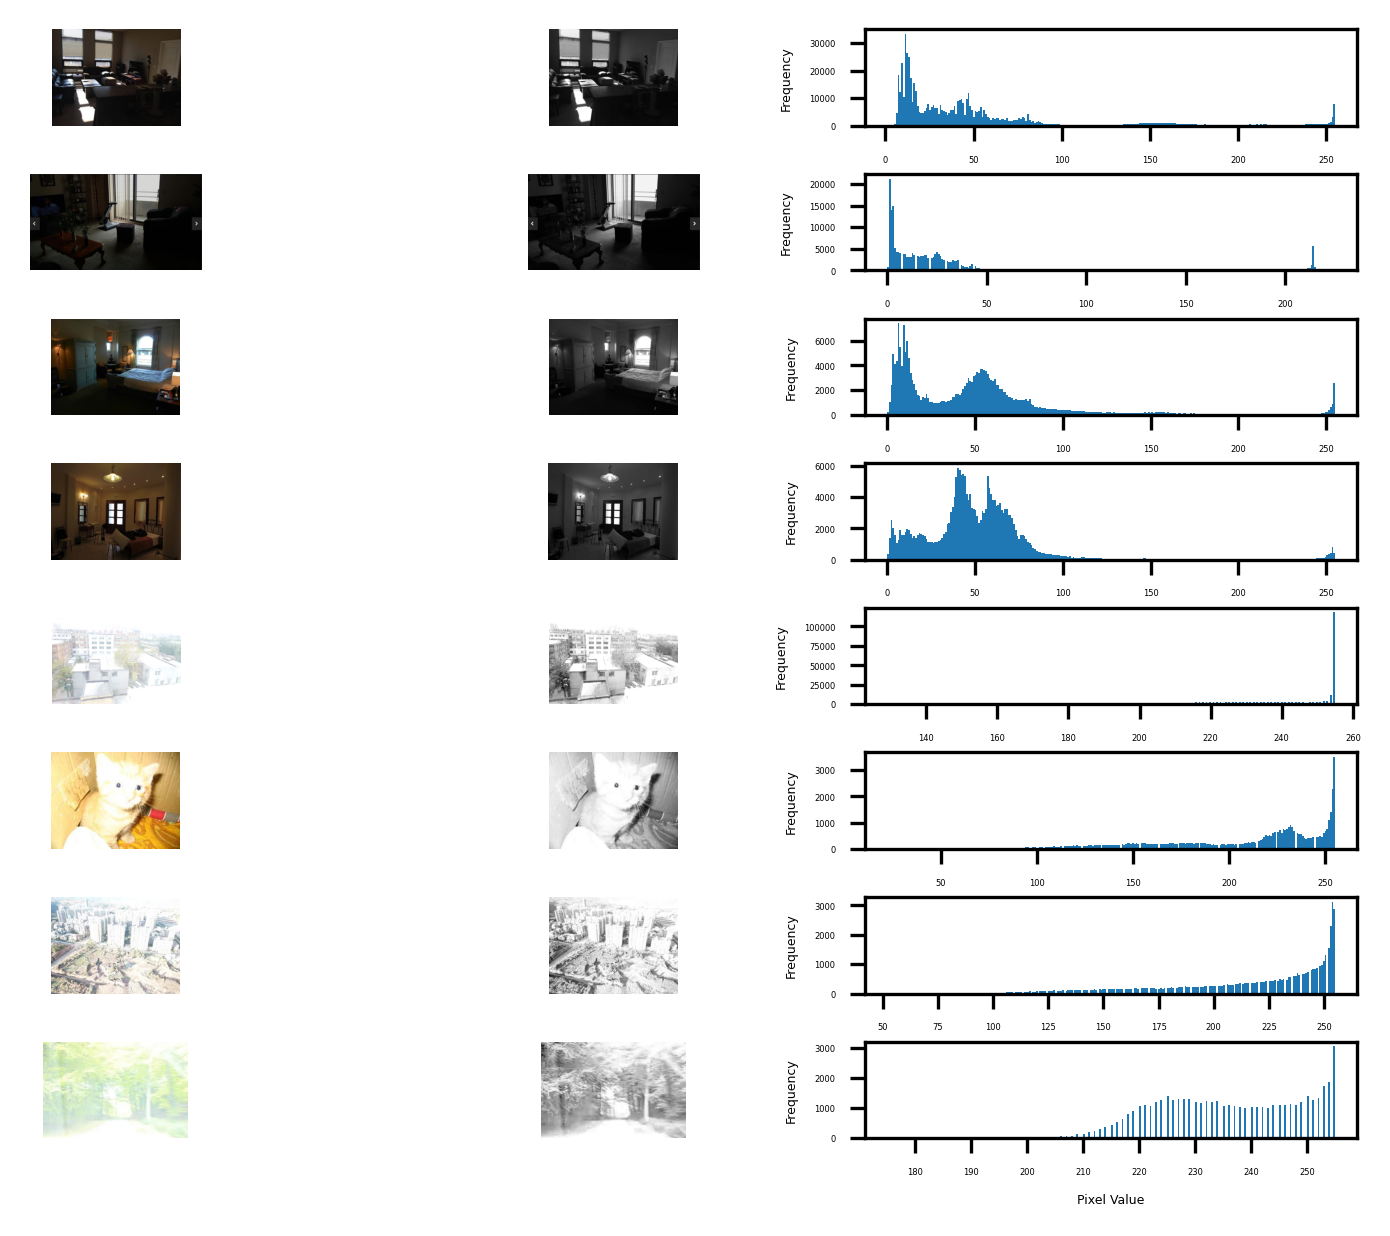

In [89]:
from matplotlib.offsetbox import FontProperties
fig, axes = plt.subplots(nrows=8, ncols=3, dpi=300)

# 在不同的子图上绘制内容并设置字体大小
font_prop = FontProperties(size=5)
for i, (img, g_img, hist) in enumerate(zip(imgs,g_imgs,hists)):
  axes[i,0].imshow(img)
  axes[i,0].set_axis_off()
  axes[i,1].imshow(g_img,cmap='gray')
  axes[i,1].set_axis_off()
  axes[i,2].hist(hist, bins=256)
  axes[i,2].set_xlabel('Pixel Value', fontsize=3)
  axes[i,2].set_ylabel('Frequency', fontsize=3)
  axes[i,2].tick_params(axis='x', labelsize=2)
  axes[i,2].tick_params(axis='y', labelsize=2)
plt.subplots_adjust(wspace=0.01, hspace=0.5)  # 调整水平和垂直间距
plt.show()

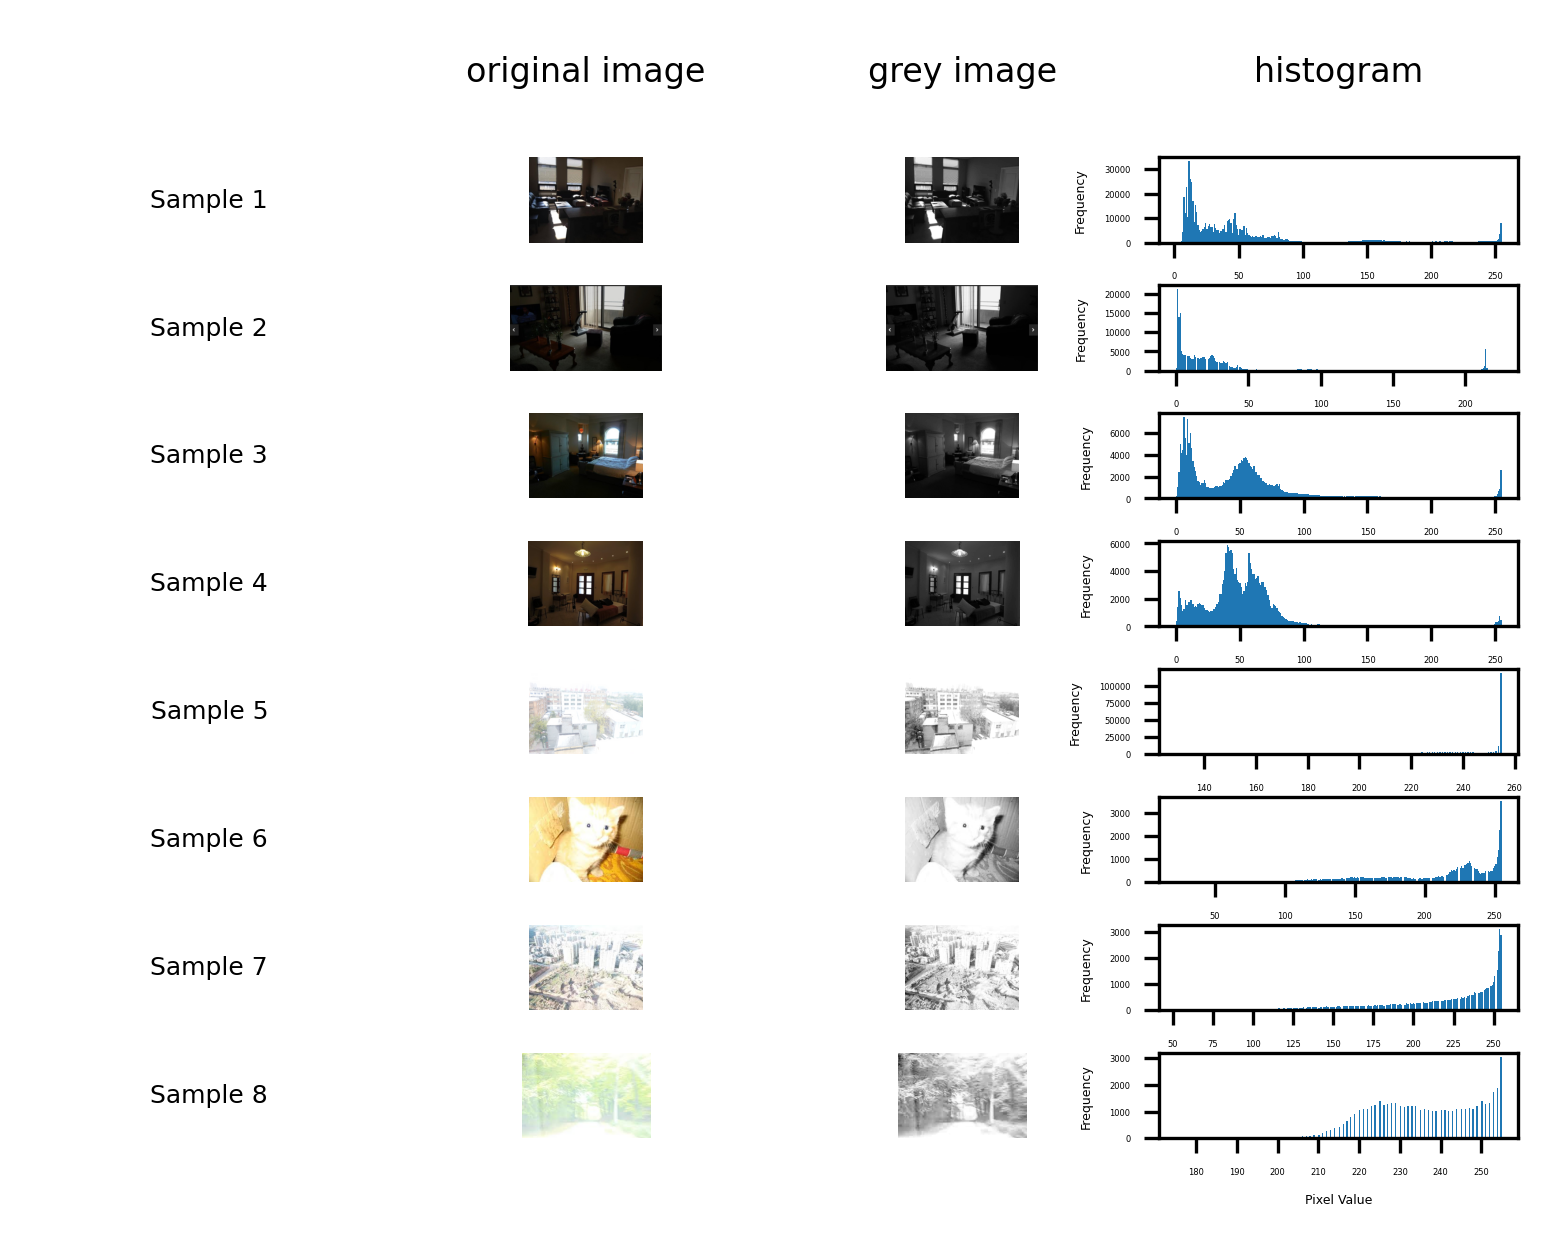

In [106]:
from matplotlib.offsetbox import FontProperties
fig, axes = plt.subplots(nrows=9, ncols=4, dpi=300)

axes[0,0].set_axis_off()
for i in range(len(imgs)):
  axes[i+1,0].text(0.5, 0.5, f'Sample {i+1}', fontsize=6, ha='center', va='center')
  axes[i+1,0].set_axis_off()

col_name = ['original image','grey image','histogram']
for i, name in enumerate(col_name):
  axes[0,i+1].text(0.5, 0.5, name, fontsize=8, ha='center', va='center')
  axes[0,i+1].set_axis_off()

for i, (img, g_img, hist) in enumerate(zip(imgs,g_imgs,hists)):
  i = i+1
  axes[i,1].imshow(img)
  axes[i,1].set_axis_off()
  axes[i,2].imshow(g_img,cmap='gray')
  axes[i,2].set_axis_off()
  axes[i,3].hist(hist, bins=256)
  axes[i,3].set_xlabel('Pixel Value', fontsize=3)
  axes[i,3].set_ylabel('Frequency', fontsize=3)
  axes[i,3].tick_params(axis='x', labelsize=2)
  axes[i,3].tick_params(axis='y', labelsize=2)

plt.subplots_adjust(wspace=0.05, hspace=0.5)  # 调整水平和垂直间距
plt.show()

#实现HE算法，对比处理结果

In [86]:
def HE(img_gray, L):
    # initialize
    gray_count = [0] * 256
    p_count = [0] * 256
    # get image shape
    hw = img_gray.shape
    height = hw[0]
    width = hw[1]
    # count how many pixels in each grayscale value
    for i in range(height):
        for j in range(width):
            gray_count[img_gray[i][j]] += 1
    # sum all pixels and map to 255
    for i in range(len(gray_count)):
        if i == 0:
            p_count[i] = (gray_count[i] / (height * width)) * 255
        else:
            p_count[i] = (gray_count[i] / (height * width)) * 255 + p_count[i-1]
    # get f(x) for each layer
    layer_range = 256 // L
    for l in range(L):
        for i in range(l * layer_range, (l + 1) * layer_range):
            k = 0
            while p_count[i] - k > 0:
                k += 1
            diff = k - p_count[i]
            if diff <= 0.5:
                p_count[i] = k
            else:
                p_count[i] = k - 1
    # do y = f(x) for each layer
    for i in range(height):
        for j in range(width):
            img_gray[i][j] = p_count[img_gray[i][j]]
    return img_gray

